# 17기 KNN 정규세션 과제

## KNN 구현해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. KNN 구현 & 파라미터 튜닝
수업 내용 및 실습 자료를 참고하여 KNN을 구현하고 파라미터 튜닝을 하며 결과를 비교해주세요.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 0. 데이터 불러오기

In [3]:
import pandas as pd
df = pd.read_csv("blackfriday.csv", index_col = 0)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780
...,...,...,...,...,...,...,...,...,...,...,...,...
4993,1000837,P00147942,M,55+,7,C,1,1,1,16.0,NaN,11701
4994,1000293,P00358242,M,55+,1,C,1,1,8,NaN,NaN,2045
4995,1001908,P00173342,M,55+,13,C,3,1,1,6.0,14.0,4505
4996,1005517,P00336742,M,55+,0,C,2,1,12,NaN,NaN,1413


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


In [6]:
# User_ID는 개인마다 다르기때문에 무의미한 변수이므로 삭제해주기로 한다
df.drop(['User_ID'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Product_ID                  4998 non-null   object 
 1   Gender                      4998 non-null   object 
 2   Age                         4998 non-null   object 
 3   Occupation                  4998 non-null   int64  
 4   City_Category               4998 non-null   object 
 5   Stay_In_Current_City_Years  4998 non-null   object 
 6   Marital_Status              4998 non-null   int64  
 7   Product_Category_1          4998 non-null   int64  
 8   Product_Category_2          3465 non-null   float64
 9   Product_Category_3          1544 non-null   float64
 10  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 468.6+ KB


In [7]:
# 성별의 값음 M/ F 로 Female은 0으로 Male은 1로 바꿔준다
df['Gender'] = df['Gender'].map({'F':0, 'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00046042,0,0-17,10,A,3,0,5,17.0,NaN,2010
1,P00347742,0,0-17,10,A,1,0,7,NaN,NaN,4483
2,P00048942,0,0-17,10,A,1,0,1,4.0,NaN,7696
3,P00145242,0,0-17,10,A,3,0,2,4.0,NaN,16429
4,P00106742,0,0-17,10,A,3,0,3,5.0,NaN,5780


In [8]:
df['Age'].value_counts()

26-35    1996
36-45    1000
18-25     906
46-50     414
51-55     350
55+       195
0-17      137
Name: Age, dtype: int64

In [9]:
#나이의 값이 0~17, 18~25, 26~35, 36~45, 46~50, 51~55, 55+로 나눠져있으니 1~7로 라벨링 해준다
df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00046042,0,1,10,A,3,0,5,17.0,NaN,2010
1,P00347742,0,1,10,A,1,0,7,NaN,NaN,4483
2,P00048942,0,1,10,A,1,0,1,4.0,NaN,7696
3,P00145242,0,1,10,A,3,0,2,4.0,NaN,16429
4,P00106742,0,1,10,A,3,0,3,5.0,NaN,5780


In [11]:
df['City_Category'].unique()

array(['A', 'B', 'C'], dtype=object)

In [13]:
len(df['Product_ID'].unique())

1797

4998개중 Product_ID의 종류가 1797개이므로 그냥 삭제해주기로한다

In [14]:
#city_Category도 라벨링을 해준다
from sklearn import preprocessing as prep
df['City_Category'] = prep.LabelEncoder().fit_transform(df['City_Category'])

In [16]:
df.isnull().sum()
#product_category_1, product_category_2에서만 결측값을 보이고 있다

Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1533
Product_Category_3            3454
Purchase                         0
dtype: int64

In [17]:
df['Product_Category_2'].value_counts()

8.0     588
14.0    496
2.0     448
16.0    392
15.0    345
5.0     258
4.0     246
6.0     148
17.0    132
11.0    110
13.0    102
9.0      65
12.0     40
3.0      35
10.0     30
18.0     23
7.0       7
Name: Product_Category_2, dtype: int64

In [19]:
df['Product_Category_2'].mode()[0] #최빈값 : 8

8.0

In [20]:
#최빈값으로 결측값을 대체해준다
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
df['Product_Category_2'].isnull().sum()

0

In [21]:
# prodcut_Category_3도 최빈값으로 결측값을 대체해준다 
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])
df['Product_Category_3'].isnull().sum()

0

In [22]:
df['Stay_In_Current_City_Years'].unique()

array(['3', '1', '2', '4+', '0'], dtype=object)

In [23]:
# 값 4에서만 4+란 값을 가지기 때문에 +를 없애주도록 한다
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

<ipython-input-23-8335fabf4353>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


In [25]:
#그리고 문자열이기 때문에 int로 바꿔주도록 한다
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [26]:
df['Gender'] = df['Gender'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Product_ID                  4998 non-null   object 
 1   Gender                      4998 non-null   int32  
 2   Age                         4998 non-null   int64  
 3   Occupation                  4998 non-null   int64  
 4   City_Category               4998 non-null   int32  
 5   Stay_In_Current_City_Years  4998 non-null   int32  
 6   Marital_Status              4998 non-null   int64  
 7   Product_Category_1          4998 non-null   int64  
 8   Product_Category_2          4998 non-null   float64
 9   Product_Category_3          4998 non-null   float64
 10  Purchase                    4998 non-null   int64  
dtypes: float64(2), int32(3), int64(5), object(1)
memory usage: 410.0+ KB


### 시각화

C:\Users\rhskr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

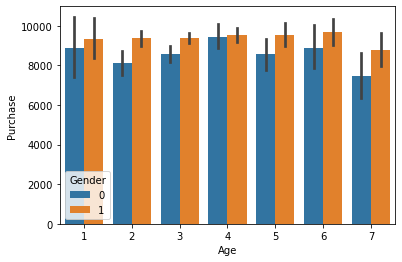

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot('Age','Purchase', hue='Gender', data=df)
#나이에 관계없이 남성이 여성보다 purchase 값이 더 높다

C:\Users\rhskr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

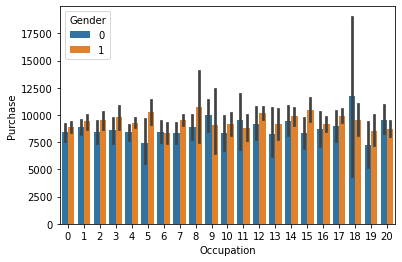

In [30]:
# Purchasing Vs Occupation
sns.barplot('Occupation','Purchase', hue='Gender', data=df)

C:\Users\rhskr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

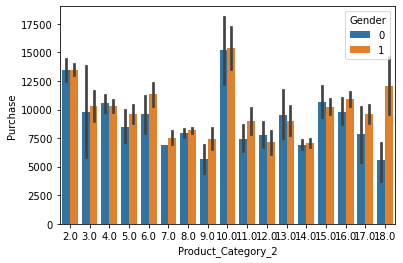

In [31]:
sns.barplot('Product_Category_2','Purchase', hue='Gender', data=df)

In [32]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00046042,0,1,10,0,3,0,5,17.0,16.0,2010
1,P00347742,0,1,10,0,1,0,7,8.0,16.0,4483
2,P00048942,0,1,10,0,1,0,1,4.0,16.0,7696
3,P00145242,0,1,10,0,3,0,2,4.0,16.0,16429
4,P00106742,0,1,10,0,3,0,3,5.0,16.0,5780
...,...,...,...,...,...,...,...,...,...,...,...
4993,P00147942,1,7,7,2,1,1,1,16.0,16.0,11701
4994,P00358242,1,7,1,2,1,1,8,8.0,16.0,2045
4995,P00173342,1,7,13,2,3,1,1,6.0,14.0,4505
4996,P00336742,1,7,0,2,2,1,12,8.0,16.0,1413


In [37]:
X = df.drop(['Purchase','Product_ID'], axis=1)
y = df[['Purchase']]

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=12212)

### Hyperparameter K 결정

In [46]:
!pip install tqdm

In [50]:
k_range = list(range(1,21))
cv_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k, p=2)
    # p=1: manhattan_distance, p=2: euclidean_distance, # p=l_p: minkoski_distance
    
    # 10-cross validation으로 탐색
    # scores: k값마다 10개의 값 누적 
    scores = cross_val_score(classifier, x_train, y_train,scoring = 'accuracy')
    
    # scores의 평균을 k값 마다의 성능 평가 결과로 사용
    cv_scores.append(scores.mean())

C:\Users\rhskr\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\rhskr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rhskr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rhskr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rh

In [52]:
# scoring이 accuracy이므로 값이 높을수록 좋음
# cv_scores를 가장 높게 만든 k값을 best_k값으로 선정
import numpy as np
best_k = [k_range[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]
print('Best k value :', best_k)

Best k value : [12, 13]


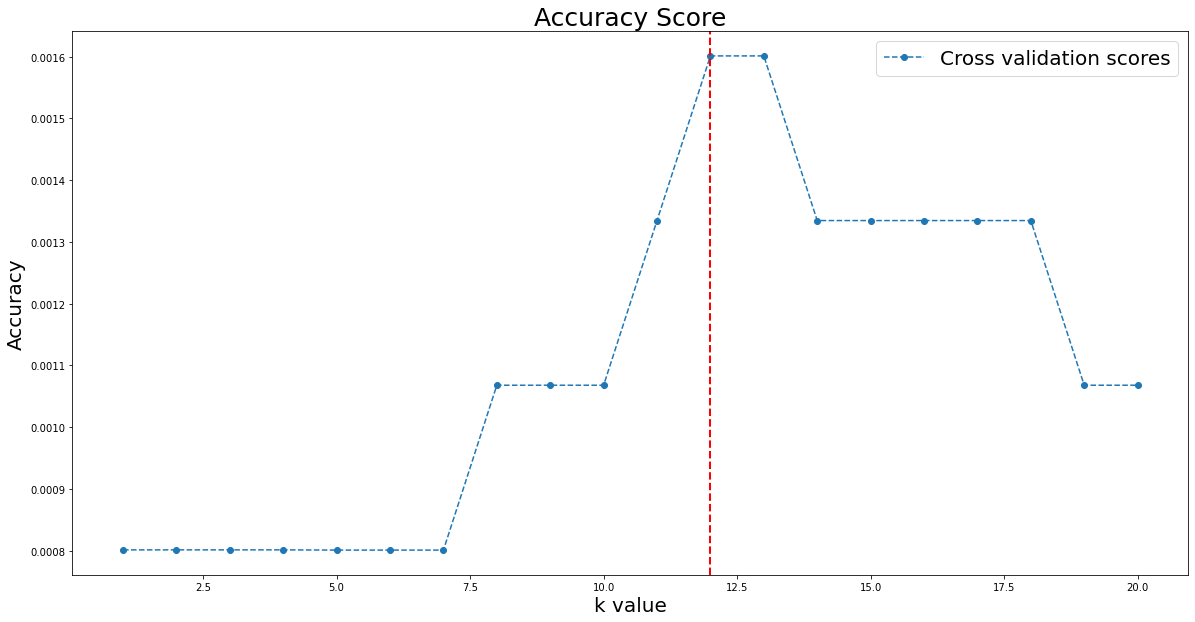

In [54]:
plt.figure(figsize=(20,10))
plt.plot(k_range, cv_scores, marker='o', linestyle='dashed')
plt.legend(['Cross validation scores'], fontsize=20)
plt.xlabel('k value', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.title('Accuracy Score', fontsize=25)
plt.axvline(best_k[0], color='r', linestyle='--', linewidth=2)
plt.show()

k = 12,13일 때 정확도의 값이 제일 높게 나온다

### Distance type 결정

### Euclidean Distance

가장 흔히 사용되는 거리측도

대응되는 x, y 값 간 차이 제곱합의 제곱근으로써, 두 관측치 사이의 직선 거리를 의미

In [57]:
euc = []
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k, p=2)
    scores = cross_val_score(classifier, x_train, y_train, scoring='accuracy')
    euc.append(scores.mean())

C:\Users\rhskr\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\rhskr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rhskr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rhskr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rh

### Manhattan Distance
x에서 y로 이동 시 각 좌표축 방향으로만 이동할 경우에 계산되는 거리

In [59]:
man = []
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k, p=1)
    scores = cross_val_score(classifier, x_train, y_train, scoring='accuracy')
    man.append(scores.mean())

C:\Users\rhskr\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\rhskr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rhskr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rhskr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rh

### KNN 구현하기

In [66]:
knn = KNeighborsClassifier(13) 
knn.fit(x_train, y_train)
print('test score : {:.3f}'.format(knn.score(x_test, y_test)))

test score : 0.001


근데 성능이 왜이렇게 낮은지 모르겠습니다 ..... ?? 